### Setup

In [14]:
import pandas as pd
from tqdm import tqdm
from wearsed.training.metric import to_event_list, correct

In [15]:
folds = [0, 1, 2, 3]
outputs = []
for fold in folds:
    output = pd.read_csv(f'../wearsed/training/attention_unet/output/attention_gates_bottleneck/f-{fold}/test_preds_epoch_28.csv')
    outputs.append(output)
output = pd.concat(outputs)
output = output.drop(output[output['targets'] == -999].index)
output = output.reset_index(drop=True)
y_true, y_pred = output['targets'], output['predictions']

In [16]:
len(y_true)

61344764

In [17]:
def get_event_lengths(y):
    events = to_event_list(y)
    event_lengths = [int(ev['end'] - ev['start']) for ev in events]
    possible_event_lengths = {i: 0 for i in range(max(event_lengths)+1)}
    for event_length in event_lengths:
        possible_event_lengths[event_length] += 1
    return pd.Series(possible_event_lengths)

### Comparison

<Axes: >

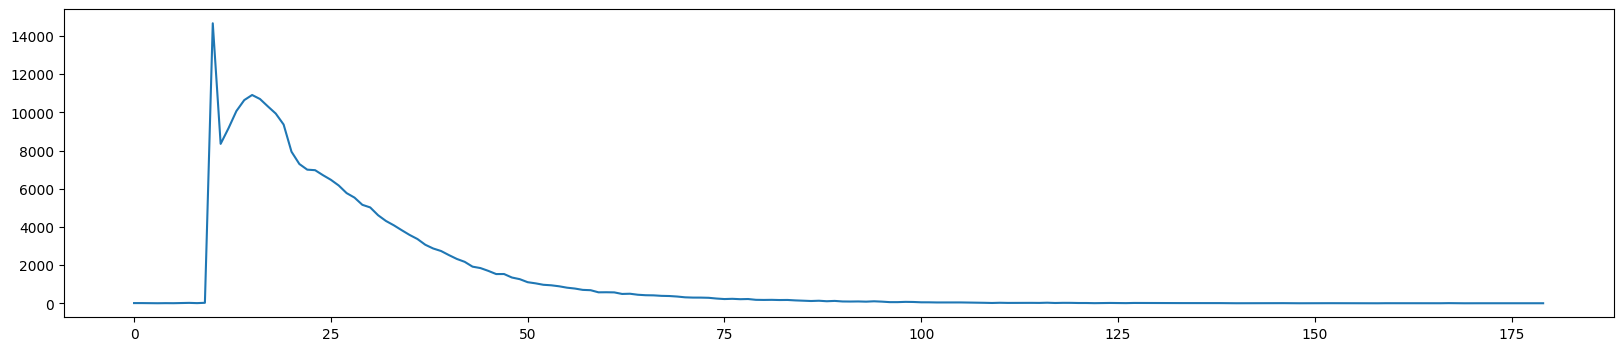

In [18]:
get_event_lengths(y_true).plot(figsize=(20, 4))

100%|██████████| 4/4 [00:07<00:00,  1.97s/it]

[0.2] Max: 1625
[0.3] Max: 764
[0.4] Max: 707
[0.5] Max: 187
[y_true] Max: 180


<Axes: >

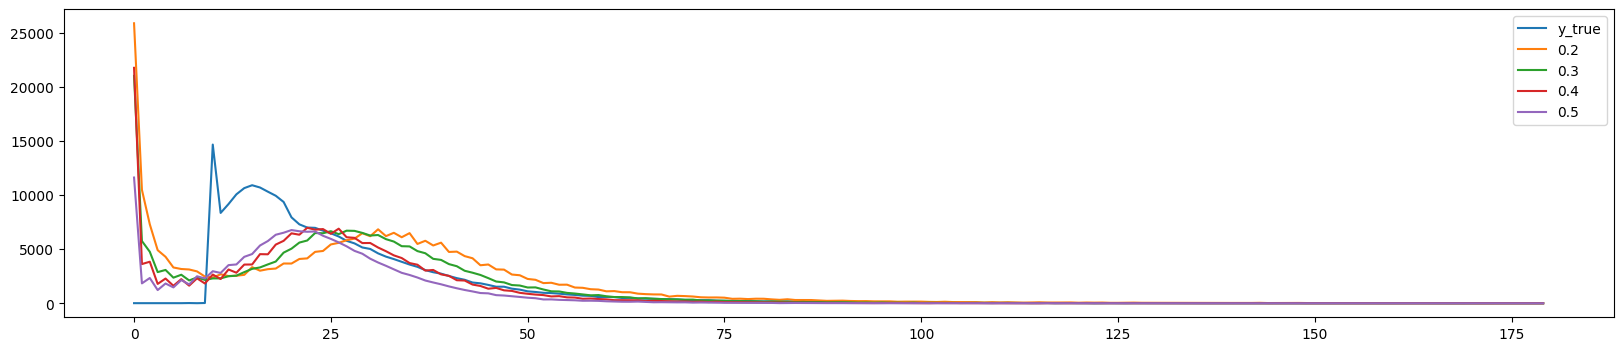

In [21]:
thrs_results = {}
thrs_results['y_true'] = get_event_lengths(y_true)
for thr in tqdm([0.2, 0.3, 0.4, 0.5]):
    thrs_results[str(thr)] = get_event_lengths((y_pred > thr)*1)
for thr in [0.2, 0.3, 0.4, 0.5, 'y_true']:
    print(f'[{thr}] Max: {len(thrs_results[str(thr)])}')
thrs_results = pd.DataFrame(thrs_results)
thrs_results[:3*60].plot(figsize=(20, 4))

100%|██████████| 4/4 [00:19<00:00,  4.80s/it]

[0.2] Max: 6370
[0.3] Max: 4247
[0.4] Max: 1607
[0.5] Max: 712
[y_true] Max: 180


<Axes: >

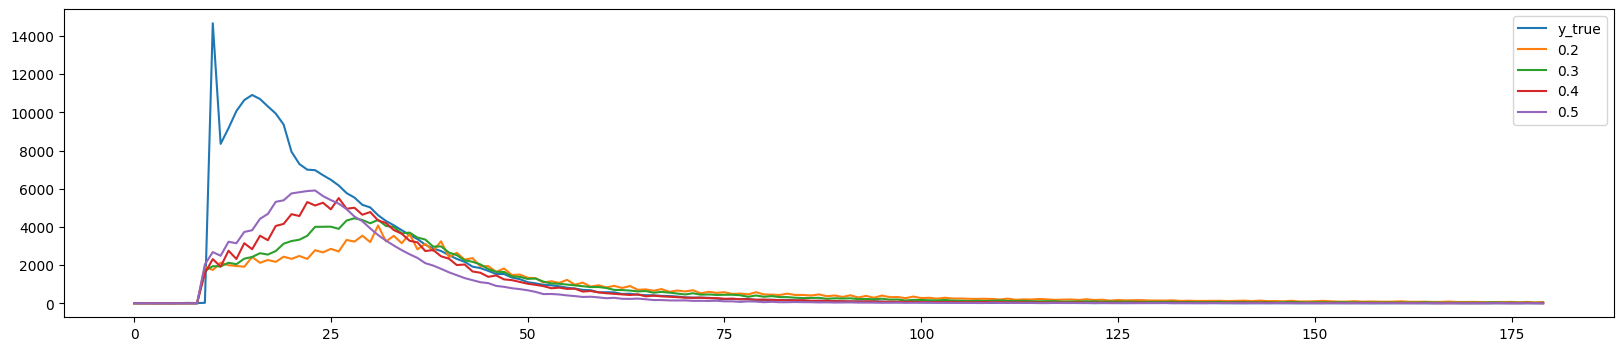

In [22]:
thrs_results_correctify = {}
thrs_results_correctify['y_true'] = get_event_lengths(y_true)
for thr in tqdm([0.2, 0.3, 0.4, 0.5]):
    thrs_results_correctify[str(thr)] = get_event_lengths(correct((y_pred > thr)*1))
for thr in [0.2, 0.3, 0.4, 0.5, 'y_true']:
    print(f'[{thr}] Max: {len(thrs_results_correctify[str(thr)])}')
thrs_results_correctify = pd.DataFrame(thrs_results_correctify)
thrs_results_correctify[:3*60].plot(figsize=(20, 4))

<Axes: >

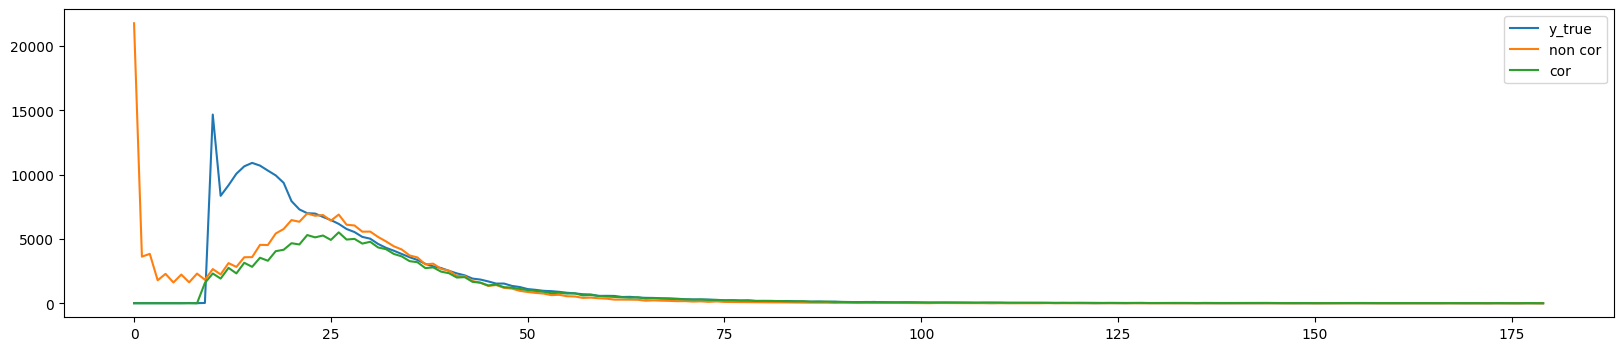

In [23]:
pd.DataFrame({
    'y_true': thrs_results['y_true'],
    'non cor': thrs_results['0.4'],
    'cor': thrs_results_correctify['0.4']
})[:3*60].plot(figsize=(20, 4))